# Important installations

In [1]:
#!pip install pettingzoo[mpe]
#!pip install stable-baselines3
#!pip install supersuit

# Imports

In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import imageio
import random
import torch
from torch import nn
from torch.optim import Adam
from torch.nn import MSELoss
import tensorflow as tf
import gym
from gym import spaces
from stable_baselines3 import A2C, PPO
from stable_baselines3.a2c import MlpPolicy
import supersuit as ss
from pettingzoo.mpe import simple_spread_v3
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy
from typing import Callable, Dict, List, Optional, Tuple, Type, Union
import time
import glob
import os
import trackpy as tp
import pims
from PIL import Image

# Evaluating Random Agent Behaviour

Here, we simulated random agent behaviour in our environment in order to see how the agents behave in the environment.

4
[ 0.          0.         -0.23549023  0.9774059   0.782514   -0.20034894
  1.0615554  -0.06423444  0.83820134 -1.28929    -0.12232697 -0.9625095
  0.76534873 -1.2346637   0.          0.          0.          0.        ]


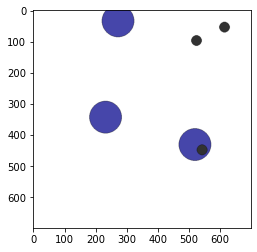

1
[ 0.          0.         -0.3578172   0.01489642  0.90484095  0.76216054
  1.1838824   0.898275    0.9605283  -0.32678047  0.12232697  0.9625095
  0.8876757  -0.27215424  0.          0.          0.          0.        ]


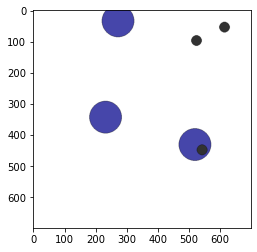

0
[ 0.          0.          0.5298585  -0.25725785  0.01716522  1.0343148
  0.29620668  1.1704293   0.07285262 -0.0546262  -0.76534873  1.2346637
 -0.8876757   0.27215424  0.          0.          0.          0.        ]


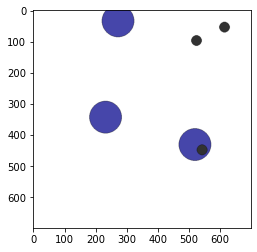

3
[ 0.          0.5        -0.23549023  0.9774059   0.782514   -0.20034894
  1.0615554  -0.06423444  0.83820134 -1.28929    -0.12232697 -0.9625095
  0.76534873 -1.2346637   0.          0.          0.          0.        ]


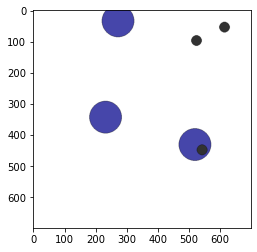

0
[-0.5         0.         -0.3578172   0.01489642  0.90484095  0.76216054
  1.1838824   0.898275    0.9605283  -0.32678047  0.12232697  0.9625095
  0.8876757  -0.27215424  0.          0.          0.          0.        ]


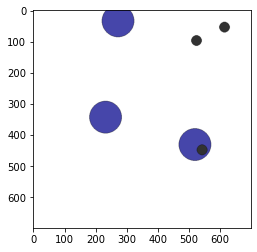

1
[ 0.         -0.          0.5298585  -0.25725785  0.01716522  1.0343148
  0.29620668  1.1704293   0.07285262 -0.0546262  -0.76534873  1.2346637
 -0.8876757   0.27215424  0.          0.          0.          0.        ]


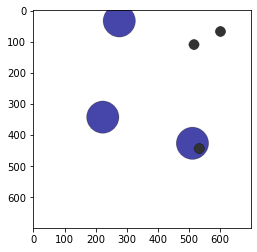

0
[ 0.         -0.125      -0.23549023  1.0274059   0.782514   -0.25034896
  1.0615554  -0.11423445  0.83820134 -1.3392899  -0.17232697 -1.0125095
  0.76534873 -1.2846638   0.          0.          0.          0.        ]


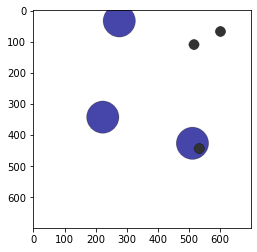

3
[-0.375       0.         -0.4078172   0.01489642  0.95484096  0.76216054
  1.2338824   0.898275    1.0105283  -0.32678047  0.17232697  1.0125095
  0.9376757  -0.27215424  0.          0.          0.          0.        ]


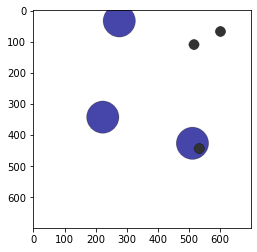

1
[-0.5        -0.          0.5298585  -0.25725785  0.01716522  1.0343148
  0.29620668  1.1704293   0.07285262 -0.0546262  -0.76534873  1.2846638
 -0.9376757   0.27215424  0.          0.          0.          0.        ]


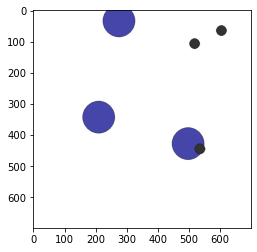

2
[ 0.         -0.09375    -0.23549023  1.0149059   0.782514   -0.23784895
  1.0615554  -0.10173444  0.83820134 -1.32679    -0.20982698 -1.0000095
  0.7153487  -1.2721637   0.          0.          0.          0.        ]


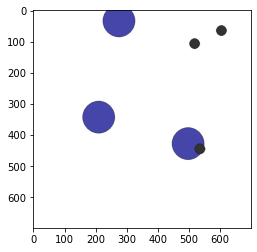

1
[-0.28125    -0.5        -0.4453172   0.01489642  0.9923409   0.76216054
  1.2713825   0.898275    1.0480283  -0.32678047  0.20982698  1.0000095
  0.9251757  -0.27215424  0.          0.          0.          0.        ]


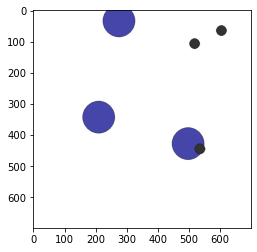

1
[-0.875      -0.          0.47985852 -0.25725785  0.06716522  1.0343148
  0.3462067   1.1704293   0.12285262 -0.0546262  -0.7153487   1.2721637
 -0.9251757   0.27215424  0.          0.          0.          0.        ]


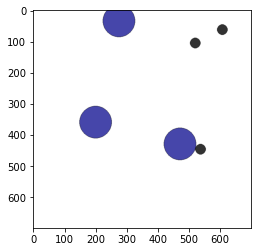

4
[ 0.5        -0.0703125  -0.23549023  1.005531    0.782514   -0.22847395
  1.0615554  -0.09235945  0.83820134 -1.317415   -0.23795198 -1.0406345
  0.62784874 -1.2627888   0.          0.          0.          0.        ]


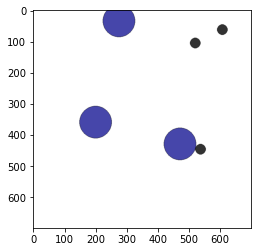

4
[-0.7109375  -0.375      -0.4734422  -0.03510358  1.020466    0.81216055
  1.2995074   0.948275    1.0761533  -0.27678046  0.23795198  1.0406345
  0.86580074 -0.22215426  0.          0.          0.          0.        ]


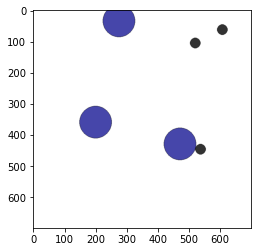

1
[-1.15625    -0.          0.3923585  -0.25725785  0.15466522  1.0343148
  0.4337067   1.1704293   0.21035261 -0.0546262  -0.62784874  1.2627888
 -0.86580074  0.22215426  0.          0.          0.          0.        ]


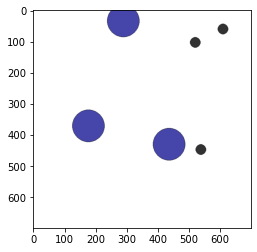

1
[ 0.375       0.44726562 -0.18549024  0.99849963  0.73251396 -0.2214427
  1.0115554  -0.0853282   0.78820133 -1.3103837  -0.3590457  -1.0711032
  0.46222374 -1.2557575   0.          0.          0.          0.        ]


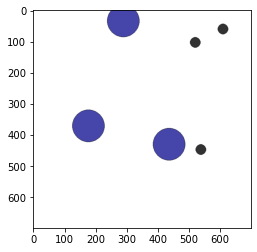

0
[-0.5332031   0.21875    -0.54453593 -0.07260358  1.0915596   0.8496605
  1.3706012   0.98577505  1.1472471  -0.23928046  0.3590457   1.0711032
  0.82126945 -0.18465425  0.          0.          0.          0.        ]


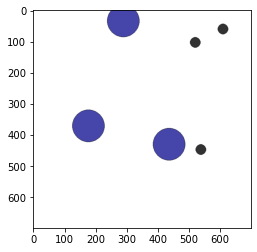

3
[-1.3671875  -0.          0.27673352 -0.25725785  0.27029023  1.0343148
  0.54933167  1.1704293   0.32597762 -0.0546262  -0.46222374  1.2557575
 -0.82126945  0.18465425  0.          0.          0.          0.        ]


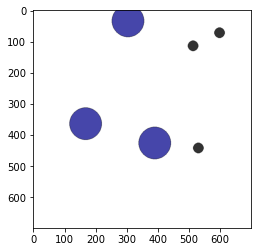

0
[-0.21875     0.33544922 -0.14799023  1.0432262   0.69501394 -0.26616925
  0.9740554  -0.13005476  0.75070137 -1.3551103  -0.44986603 -1.0939548
  0.288005   -1.3004841   0.          0.          0.          0.        ]


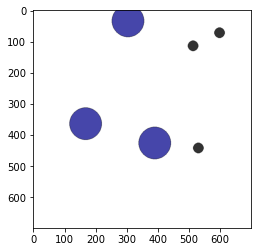

3
[-0.39990234  0.1640625  -0.5978563  -0.05072858  1.1448799   0.82778555
  1.4239215   0.9639      1.2005674  -0.26115546  0.44986603  1.0939548
  0.73787105 -0.20652926  0.          0.          0.          0.        ]


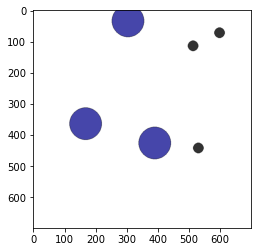

4
[-1.0253906  -0.5         0.14001475 -0.25725785  0.40700898  1.0343148
  0.6860504   1.1704293   0.46269637 -0.0546262  -0.288005    1.3004841
 -0.73787105  0.20652926  0.          0.          0.          0.        ]


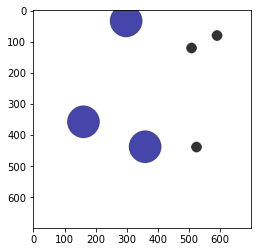

0
[-0.1640625   0.2515869  -0.16986524  1.0767711   0.71688896 -0.29971418
  0.99593043 -0.16359968  0.77257633 -1.3886552  -0.46798128 -1.1110935
  0.20734093 -1.384029    0.          0.          0.          0.        ]


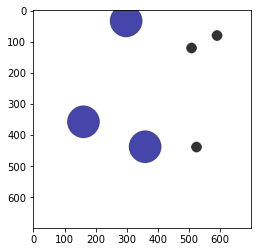

2
[-0.29992676 -0.37695312 -0.6378465  -0.03432233  1.1848702   0.8113793
  1.4639117   0.9474938   1.2405577  -0.27756172  0.46798128  1.1110935
  0.6753222  -0.2729355   0.          0.          0.          0.        ]


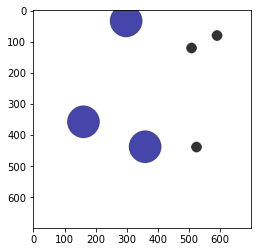

0
[-0.76904297  0.125       0.03747569 -0.30725783  0.509548    1.0843148
  0.7885895   1.2204293   0.56523544 -0.0046262  -0.20734093  1.384029
 -0.6753222   0.2729355   0.          0.          0.          0.        ]


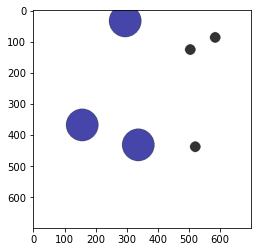

2
[-0.12304688  0.18869019 -0.18627149  1.1019298   0.7332952  -0.32487288
  1.0123367  -0.18875837  0.7889826  -1.4138138  -0.48156768 -1.1739475
  0.14684288 -1.3966876   0.          0.          0.          0.        ]


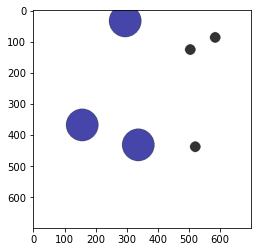

1
[ 0.27505493 -0.28271484 -0.66783917 -0.07201765  1.214863    0.8490746
  1.4939044   0.9851891   1.2705503  -0.23986639  0.48156768  1.1739475
  0.6284106  -0.22274019  0.          0.          0.          0.        ]


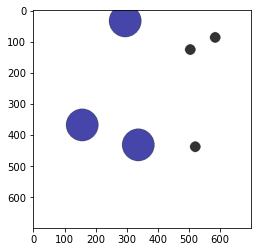

0
[-0.5767822   0.09375    -0.0394286  -0.29475784  0.5864523   1.0718148
  0.8654938   1.2079293   0.64213973 -0.0171262  -0.14684288  1.3966876
 -0.6284106   0.22274019  0.          0.          0.          0.        ]


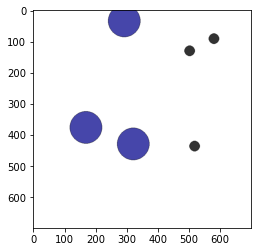

1
[ 0.40771484  0.14151764 -0.19857617  1.1207988   0.74559987 -0.3437419
  1.0246414  -0.20762739  0.8012873  -1.4326829  -0.4417575  -1.2210879
  0.10146935 -1.4061817   0.          0.          0.          0.        ]


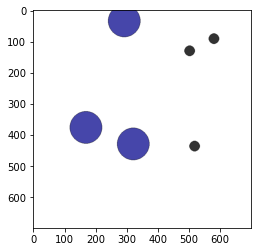

1
[-0.2937088  -0.21203613 -0.6403337  -0.10028913  1.1873574   0.8773461
  1.4663988   1.0134606   1.2430449  -0.21159491  0.4417575   1.2210879
  0.54322684 -0.18509372  0.          0.          0.          0.        ]


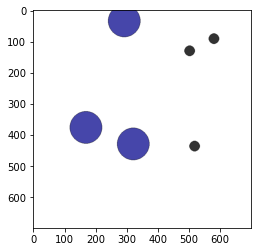

1
[-0.43258667  0.0703125  -0.09710683 -0.28538284  0.6441305   1.0624398
  0.923172    1.1985543   0.69981796 -0.0265012  -0.10146935  1.4061817
 -0.54322684  0.18509372  0.          0.          0.          0.        ]


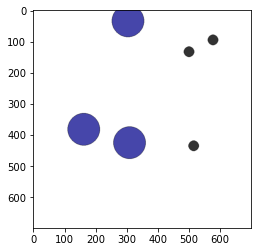

4
[-0.19421387  0.10613823 -0.15780468  1.1349506   0.7048284  -0.35789365
  0.98386985 -0.22177915  0.7605158  -1.4468347  -0.5118999  -1.2564434
  0.01743919 -1.4133022   0.          0.          0.          0.        ]


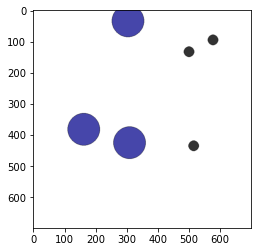

0
[-0.7202816  -0.1590271  -0.66970456 -0.12149274  1.2167283   0.8985497
  1.4957697   1.0346642   1.2724156  -0.1903913   0.5118999   1.2564434
  0.5293391  -0.15685885  0.          0.          0.          0.        ]


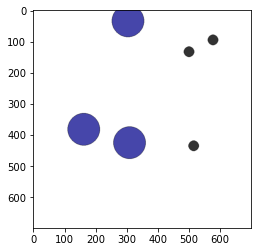

0
[-0.82444     0.05273438 -0.1403655  -0.27835158  0.6873892   1.0554086
  0.96643066  1.1915231   0.7430766  -0.03353246 -0.01743919  1.4133022
 -0.5293391   0.15685885  0.          0.          0.          0.        ]


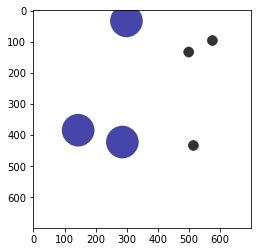

3
[-0.1456604   0.5796037  -0.17722607  1.1455644   0.7242498  -0.36850747
  1.0032912  -0.23239298  0.7799372  -1.4574485  -0.56450665 -1.2829599
 -0.04558342 -1.4186426   0.          0.          0.          0.        ]


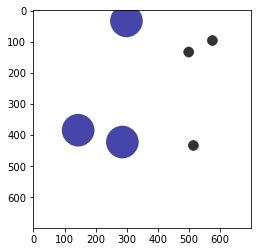

1
[-0.5402112  -0.11927032 -0.7417327  -0.13739546  1.2887565   0.91445243
  1.5677979   1.0505669   1.3444438  -0.17448859  0.56450665  1.2829599
  0.5189232  -0.1356827   0.          0.          0.          0.        ]


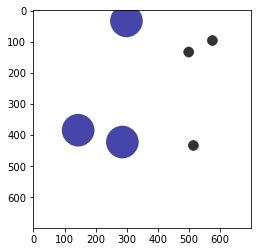

2
[-0.61833     0.03955078 -0.2228095  -0.27307814  0.7698332   1.0501351
  1.0488747   1.1862496   0.82552063 -0.03880589  0.04558342  1.4186426
 -0.5189232   0.1356827   0.          0.          0.          0.        ]


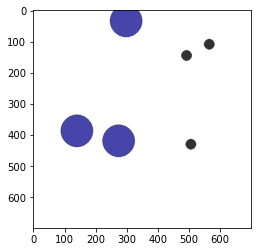

4
[-0.1092453  -0.06529725 -0.19179212  1.2035248   0.73881584 -0.42646784
  1.0178573  -0.29035336  0.7945032  -1.5154089  -0.6039617  -1.3528473
 -0.09285038 -1.4726479   0.          0.          0.          0.        ]


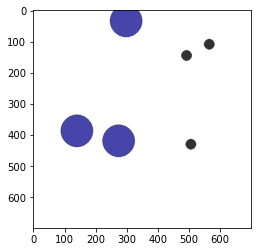

1
[-0.9051584  -0.08945274 -0.79575384 -0.14932248  1.3427776   0.92637944
  1.621819    1.0624939   1.3984649  -0.16256155  0.6039617   1.3528473
  0.5111114  -0.11980059  0.          0.          0.          0.        ]


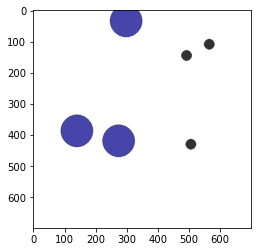

3
[ 0.0362525   0.02966309 -0.2846425  -0.26912308  0.83166623  1.04618
  1.1107076   1.1822945   0.8873536  -0.04276097  0.09285038  1.4726479
 -0.5111114   0.11980059  0.          0.          0.          0.        ]


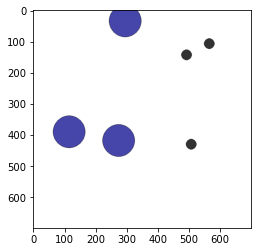

1
[-0.08193398  0.45102707 -0.20271665  1.196995    0.74974036 -0.41993812
  1.0287819  -0.2838236   0.8054278  -1.5088791  -0.68355304 -1.3552629
 -0.0783006  -1.4631518   0.          0.          0.          0.        ]


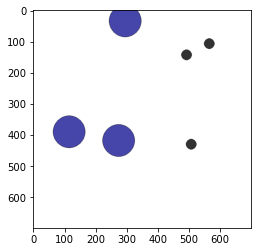

1
[-1.1788688  -0.06708956 -0.8862697  -0.15826777  1.4332935   0.9353247
  1.7123349   1.0714393   1.4889808  -0.15361628  0.68355304  1.3552629
  0.60525244 -0.107889    0.          0.          0.          0.        ]


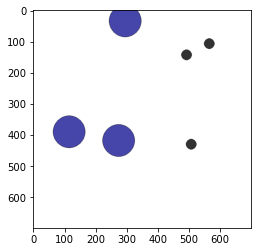

2
[ 0.02718937 -0.4777527  -0.28101724 -0.26615676  0.82804096  1.0432137
  1.1070825   1.1793282   0.8837284  -0.04572728  0.0783006   1.4631518
 -0.60525244  0.107889    0.          0.          0.          0.        ]


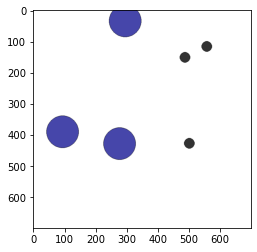

3
[-0.5614505   0.3382703  -0.21091004  1.2420977   0.75793374 -0.46504083
  1.0369753  -0.32892632  0.81362116 -1.5539818  -0.7932465  -1.4070745
 -0.06738827 -1.5560298   0.          0.          0.          0.        ]


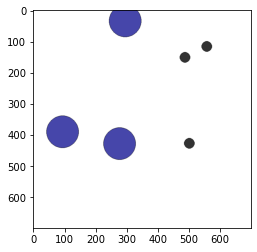

1
[-1.3841516  -0.05031717 -1.0041566  -0.16497672  1.5511802   0.94203365
  1.8302218   1.0781481   1.6068677  -0.14690733  0.7932465   1.4070745
  0.7258583  -0.14895532  0.          0.          0.          0.        ]


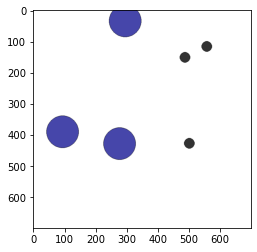

3
[ 0.52039206 -0.3583145  -0.27829832 -0.31393203  0.82532203  1.090989
  1.1043636   1.2271035   0.88100946  0.00204799  0.06738827  1.5560298
 -0.7258583   0.14895532  0.          0.          0.          0.        ]


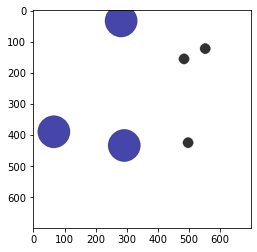

1
[-0.42108786 -0.24629727 -0.2670551   1.2759248   0.8140788  -0.49886787
  1.0931203  -0.36275336  0.86976624 -1.5878088  -0.87551665 -1.4459332
  0.04079598 -1.6256883   0.          0.          0.          0.        ]


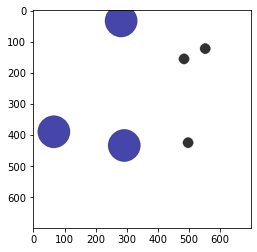

2
[-1.5381137  -0.03773788 -1.1425717  -0.17000844  1.6895955   0.9470654
  1.9686369   1.0831798   1.7452829  -0.14187561  0.87551665  1.4459332
  0.91631263 -0.17975505  0.          0.          0.          0.        ]


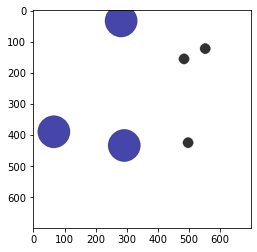

4
[ 0.39029402 -0.7687359  -0.2262591  -0.34976348  0.7732828   1.1268204
  1.0523243   1.2629349   0.82897025  0.03787944 -0.04079598  1.6256883
 -0.91631263  0.17975505  0.          0.          0.          0.        ]


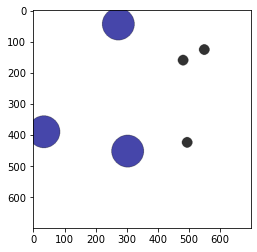

3
[-0.8158159  -0.18472296 -0.30916387  1.2512951   0.8561876  -0.47423813
  1.1352291  -0.33812362  0.911875   -1.5631791  -0.9872192  -1.4250773
  0.12193418 -1.6779321   0.          0.          0.          0.        ]


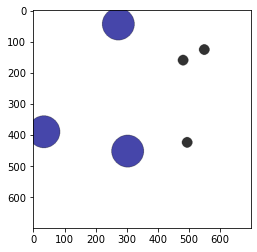

0
[-0.65358526 -0.02830341 -1.2963831  -0.17378221  1.8434068   0.95083916
  2.1224482   1.0869536   1.8990942  -0.13810182  0.9872192   1.4250773
  1.1091534  -0.25285485  0.          0.          0.          0.        ]


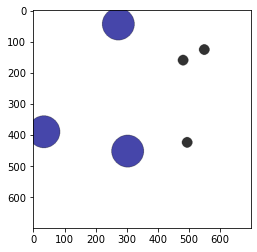

0
[ 0.29272053 -0.07655191 -0.18722971 -0.42663708  0.7342534   1.203694
  1.0132949   1.3398086   0.78994083  0.11475303 -0.12193418  1.6779321
 -1.1091534   0.25285485  0.          0.          0.          0.        ]


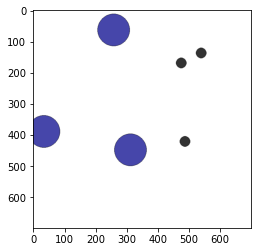

1
[-0.61186194 -0.63854223 -0.39074546  1.2328228   0.9377692  -0.45576584
  1.2168107  -0.31965134  0.9934566  -1.5447068  -0.97099614 -1.4094354
  0.23278782 -1.6671151   0.          0.          0.          0.        ]


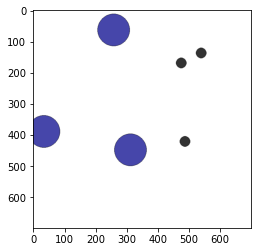

0
[-0.49018896 -0.02122756 -1.3617417  -0.17661256  1.9087653   0.9536695
  2.1878068   1.089784    1.9644527  -0.13527149  0.97099614  1.4094354
  1.203784   -0.2576797   0.          0.          0.          0.        ]


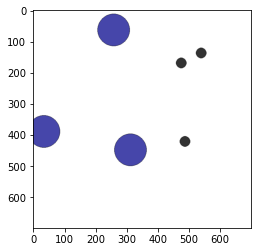

3
[ 0.21954039 -0.05741394 -0.15795764 -0.43429226  0.7049814   1.2113492
  0.98402286  1.3474637   0.76066875  0.12240822 -0.23278782  1.6671151
 -1.203784    0.2576797   0.          0.          0.          0.        ]


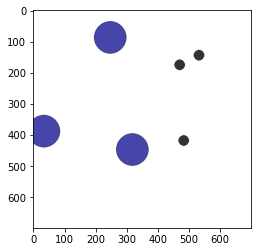

3
[-0.95889646 -0.47890666 -0.45193166  1.1689686   0.99895537 -0.39191163
  1.2779969  -0.25579712  1.0546428  -1.4808526  -0.95882887 -1.3477039
  0.31592804 -1.6090022   0.          0.          0.          0.        ]


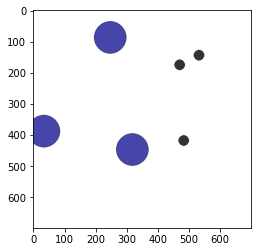

1
[-0.36764172 -0.01592067 -1.4107605  -0.17873532  1.9577843   0.95579225
  2.2368257   1.0919068   2.0134716  -0.13314873  0.95882887  1.3477039
  1.2747569  -0.26129833  0.          0.          0.          0.        ]


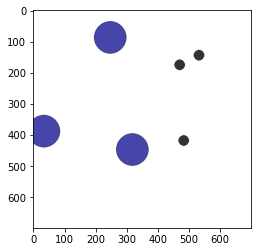

0
[ 0.1646553  -0.5430604  -0.13600361 -0.44003364  0.6830273   1.2170906
  0.9620688   1.3532051   0.73871475  0.12814961 -0.31592804  1.6090022
 -1.2747569   0.26129833  0.          0.          0.          0.        ]


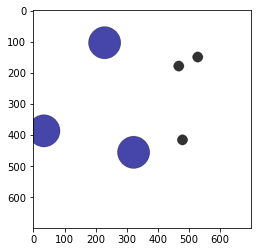

4
[-0.71917236 -0.85918    -0.5478213   1.1210779   1.094845   -0.34402093
  1.3738865  -0.20790644  1.1505324  -1.432962   -0.8997034  -1.3014053
  0.4282832  -1.6154176   0.          0.          0.          0.        ]


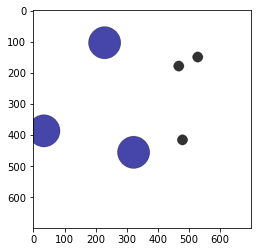

0
[-0.77573127 -0.0119405  -1.4475247  -0.18032739  1.9945484   0.95738435
  2.2735898   1.0934988   2.0502357  -0.13155666  0.8997034   1.3014053
  1.3279866  -0.31401232  0.          0.          0.          0.        ]


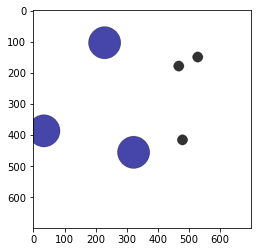

0
[ 0.12349147 -0.40729535 -0.11953808 -0.4943397   0.6665618   1.2713966
  0.94560325  1.4075111   0.7222492   0.18245566 -0.4282832   1.6154176
 -1.3279866   0.31401232  0.          0.          0.          0.        ]


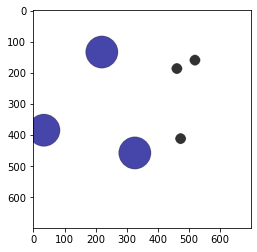

0
[-0.53937924 -0.144385   -0.6197385   1.03516     1.1667622  -0.25810295
  1.4458038  -0.12198845  1.2224497  -1.347044   -0.90535927 -1.2166814
  0.5125496  -1.5702292   0.          0.          0.          0.        ]


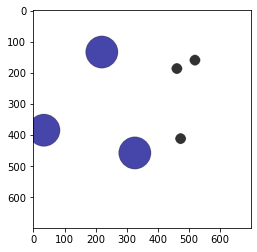

3
[-0.5817985  -0.00895538 -1.5250978  -0.18152143  2.0721216   0.9585784
  2.351163    1.094693    2.127809   -0.13036261  0.90535927  1.2166814
  1.4179089  -0.3535478   0.          0.          0.          0.        ]


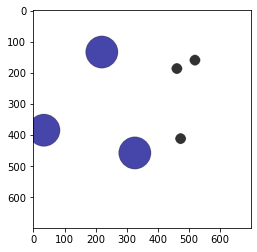

0
[ 0.0926186  -0.3054715  -0.10718893 -0.5350692   0.65421265  1.3121262
  0.9332541   1.4482406   0.7099001   0.2231852  -0.5125496   1.5702292
 -1.4179089   0.3535478   0.          0.          0.          0.        ]


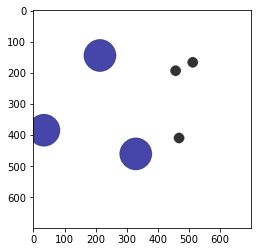

0
[-0.40453443 -0.10828875 -0.67367643  1.0207214   1.2207001  -0.24366444
  1.4997417  -0.10754994  1.2763876  -1.3326055  -0.9096012  -1.2031384
  0.5757494  -1.5863378   0.          0.          0.          0.        ]


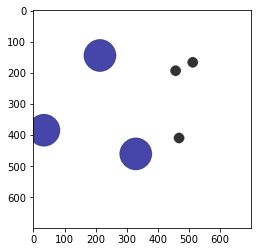

2
[-0.43634886 -0.50671655 -1.5832777  -0.18241698  2.1303015   0.9594739
  2.4093428   1.0955884   2.185989   -0.12946707  0.9096012   1.2031384
  1.4853506  -0.38319942  0.          0.          0.          0.        ]


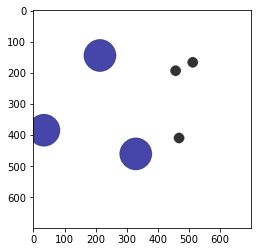

3
[ 0.06946395 -0.22910362 -0.09792707 -0.56561637  0.6449508   1.3426733
  0.9239923   1.4787879   0.7006382   0.25373235 -0.5757494   1.5863378
 -1.4853506   0.38319942  0.          0.          0.          0.        ]


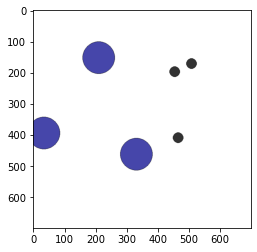

1
[-0.3034008  -0.08121656 -0.7141299   1.0098926   1.2611536  -0.23283558
  1.5401951  -0.09672107  1.316841   -1.3217766  -0.91278267 -1.2429812
  0.6231492  -1.5984193   0.          0.          0.          0.        ]


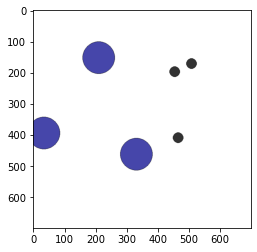

4
[ 0.17273836 -0.3800374  -1.6269126  -0.23308863  2.1739364   1.0101455
  2.4529777   1.14626     2.2296236  -0.07879542  0.91278267  1.2429812
  1.5359318  -0.3554381   0.          0.          0.          0.        ]


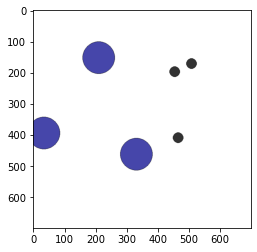

4
[ 0.05209796 -0.67182773 -0.09098068 -0.5885267   0.6380044   1.3655837
  0.9170459   1.5016983   0.6936918   0.2766427  -0.6231492   1.5984193
 -1.5359318   0.3554381   0.          0.          0.          0.        ]


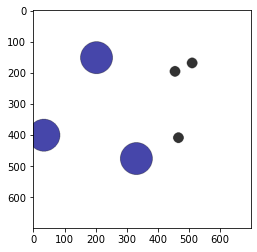

3
[-0.7275506  -0.06091242 -0.74447     1.0017709   1.2914937  -0.22471392
  1.5705352  -0.08859941  1.3471811  -1.3136549  -0.86516875 -1.2728633
  0.6586991  -1.6574804   0.          0.          0.          0.        ]


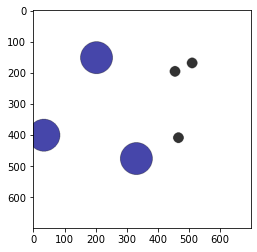

0
[ 0.12955377  0.21497194 -1.6096387  -0.27109236  2.1566625   1.0481493
  2.435704    1.1842638   2.21235    -0.04079168  0.86516875  1.2728633
  1.5238678  -0.38461715  0.          0.          0.          0.        ]


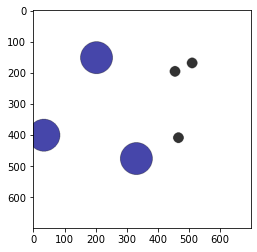

4
[ 0.03907347 -0.00387079 -0.08577088 -0.6557095   0.6327946   1.4327664
  0.9118361   1.568881    0.688482    0.3438255  -0.6586991   1.6574804
 -1.5238678   0.38461715  0.          0.          0.          0.        ]


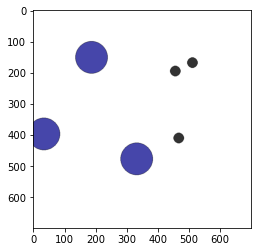

3
[-0.54566294 -0.54568434 -0.81722504  0.9956796   1.3642488  -0.21862267
  1.6432903  -0.08250817  1.4199362  -1.3075637  -0.7794583  -1.2452748
  0.7353615  -1.6517762   0.          0.          0.          0.        ]


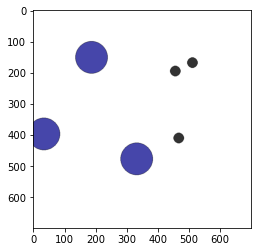

0
[ 0.09716533  0.16122897 -1.5966834  -0.24959517  2.143707    1.0266521
  2.4227486   1.1627666   2.1993945  -0.06228888  0.7794583   1.2452748
  1.5148197  -0.40650144  0.          0.          0.          0.        ]


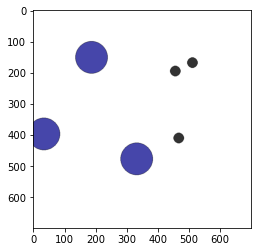

2
[ 0.0293051   0.4970969  -0.08186354 -0.6560966   0.62888724  1.4331535
  0.9079287   1.5692681   0.68457466  0.34421256 -0.7353615   1.6517762
 -1.5148197   0.40650144  0.          0.          0.          0.        ]


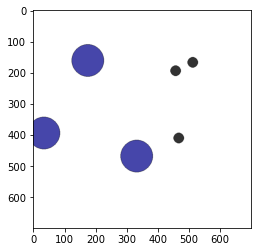

None
[-0.40924722 -0.90926325 -0.87179136  0.9411112   1.418815   -0.16405424
  1.6978565  -0.02793974  1.4745024  -1.2529953  -0.71517545 -1.1745834
  0.7928583  -1.5474981   0.          0.          0.          0.        ]


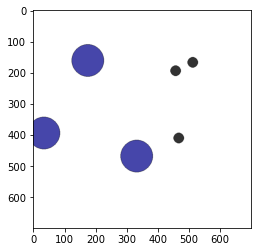

None
[ 0.07287399  0.12092172 -1.5869668  -0.23347227  2.1339905   1.0105293
  2.413032    1.1466438   2.189678   -0.07841177  0.71517545  1.1745834
  1.5080338  -0.37291464  0.          0.          0.          0.        ]


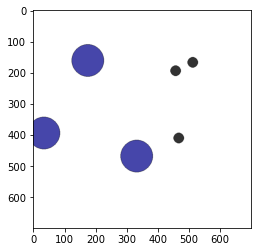

None
[ 0.52197886  0.37282267 -0.07893302 -0.6063869   0.6259568   1.3834438
  0.90499824  1.5195583   0.68164414  0.29450285 -0.7928583   1.5474981
 -1.5080338   0.37291464  0.          0.          0.          0.        ]


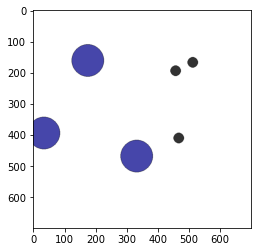

In [14]:
env = simple_spread_v3.env(N=3, local_ratio=0.5, max_cycles=25, continuous_actions=False, render_mode = 'rgb_array')
env.reset()
#env.render()
r = []
i = 0
img_array = []
all_positions = []
for agent in env.agent_iter():
    observation, reward, termination, truncation, info = env.last()

    r.append(reward)
    i+=1
    if termination or truncation:
        action = None
    else:
        action = env.action_space(agent).sample()
        x = observation[0]
        y = observation[1]
        all_positions.append((x,y))
    env.step(action)
    print(action)
    print(observation)
    img= env.render()
    img_array.append(img)
    plt.imshow(img)
    plt.pause(0.01)
    #clear_output(wait = True)
env.close()

In [4]:
avgr1 = sum(r)/i
print("Average Reward: ", avgr1)

Average Reward:  -0.9173518368885576


### Storing the trajectory followed by the agents

In [7]:
output_dir = r"C:\Users\Mansi Panchal\OneDrive\Desktop\msc_project\sequential_images\random" 
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for idx, imgarray in enumerate(img_array, 1):  
    img = Image.fromarray(imgarray) 
    img.save(os.path.join(output_dir, f'image_{idx}.png'))

In [8]:
image_files = [file for file in os.listdir(output_dir) if file.startswith("image_") and file.endswith(".png")]
image_files.sort()

base_image = Image.open(os.path.join(output_dir, image_files[-1]))
for overlay_file in image_files:
    overlay_image = Image.open(os.path.join(output_dir, overlay_file))
    base_image = Image.blend(base_image, overlay_image, alpha=0.01)

base_image.save(os.path.join(output_dir, "overlay_result.jpg"))

print("Overlay complete.")

Overlay complete.


### Plotting the random agent behaviour

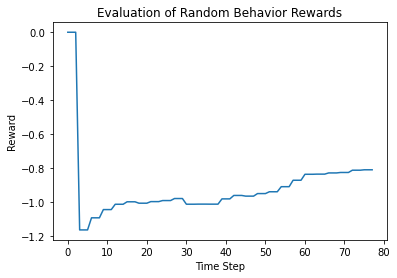

In [9]:
# Plot the rewards
plt.plot(r)
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.title('Evaluation of Random Behavior Rewards')
plt.show()

In [6]:
env_fn = simple_spread_v3
env_kwargs = {  "N": 3,
                "local_ratio": 0.5,
                "max_cycles": 25,
                "continuous_actions": False,}

### Evaluating the reward values over a 100 episodes 

In [7]:
def eval_random(env_fn, num_ep: int = 100, render_mode: str = None, **env_kwargs):
    # Evaluate a random agent reward
    env = env_fn.env(render_mode=render_mode, **env_kwargs)

    print(
        f"\n Evaluating {str(env.metadata['name'])} (num_ep={num_ep}, render_mode={render_mode})"
    )
    episode_rewards = []
    rewards = {agent: 0 for agent in env.possible_agents}

    for i in range(num_ep):
        episode_reward = 0
        env.reset(seed=i)

        for agent in env.agent_iter():
            obs, reward, termination, truncation, info = env.last()

            for agent in env.agents:
                  rewards[agent] += env.rewards[agent]
              #print(rewards[agent], env.rewards[agent])
            episode_reward = episode_reward + reward
            #print(reward)
            if termination or truncation:
                break
            else:
                act = env.action_space(agent).sample()
                #print(act)
            env.step(act)
        episode_rewards.append(episode_reward)
    env.close()

    avg_reward = sum(rewards.values()) / len(rewards.values())
    print("Avg reward: ", avg_reward)
    return episode_rewards

In [8]:
# EVALUATING THE AVERAGE REWARD FOR RANDOM AGENT BEHAVIOUR IN OUR ENVIRONMENT
epr1 = eval_random(env_fn, num_ep=100, render_mode= "rgb_array", **env_kwargs)


 Evaluating simple_spread_v3 (num_ep=100, render_mode=rgb_array)
Avg reward:  -2677.0905733322124


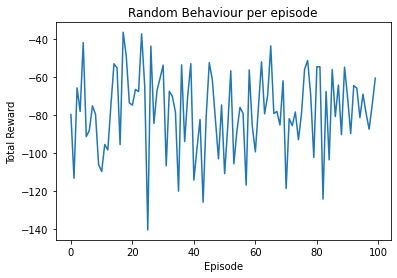

In [9]:
plt.plot(epr1)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Random Behaviour per episode")
plt.show()

# Multi-Agent Reinforcement Learning

Here in this section, training for the environment agents using Stable Baselines3 is implemented. A2C aglorithm is used for this.

In [10]:
logdir = r"C:\Users\Mansi Panchal\OneDrive\Desktop\msc_project\Logs"

In [11]:
def train_model(env_fn, steps: int = 10_000, seed: int= 0, **env_kwargs):

    env = env_fn.parallel_env(**env_kwargs)

    env.reset(seed=seed)

    print(f"Training {str(env.metadata['name'])}.")

    env = ss.pettingzoo_env_to_vec_env_v1(env)
    #env = MarkovVectorEnv(env)
    env = ss.concat_vec_envs_v1(env, 5, num_cpus=2, base_class="stable_baselines3")
    policy_kwargs = {'net_arch': [128,128]}
    model = A2C(
        MlpPolicy,
        env,
        verbose=1,
        learning_rate= lambda f: f*2e-3,
        gamma = 0.9,
        ent_coef = 0.01,
        vf_coef = 0.5,
        gae_lambda = 0.6,
        policy_kwargs= policy_kwargs,
        tensorboard_log= logdir
    )

    model.learn(total_timesteps=steps, tb_log_name = "A2C")

    model.save(f"{env.unwrapped.metadata.get('name')}_{time.strftime('%Y%m%d-%H%M%S')}")

    print("Model has been saved.")

    print("Training Complete.")

    env.close()

In [12]:
#train_model(env_fn, steps=2000_000, seed=32, **env_kwargs)

In [15]:
try:
    latest_policy = max(glob.glob("{}*.zip".format(env.unwrapped.metadata.get('name'))),
                            key = os.path.getctime)
except ValueError:
    print("Policy not found.")
    exit(0)
print(latest_policy)

simple_spread_v3_20230813-153703.zip


The policy performing best on the environment is explicitly saved in best policy variable and we will load this policy only for evaluation, others trained after this will just be for experiments.

In [16]:
best_policy = 'simple_spread_v3_20230803-150705.zip'

In [17]:
model = A2C.load(best_policy)

# Evaluating the trained agent

After training, we evaluate the trained model as same as the random agent to draw comparison between the two.

In [18]:
def eval_model(env_fn, num_ep: int = 100, render_mode: str = None, **env_kwargs):
    # Evaluate a trained agent 
    env = env_fn.env(render_mode=render_mode, **env_kwargs)

    print(
        f"\nStarting evaluation on {str(env.metadata['name'])} (num_ep={num_ep}, render_mode={render_mode})"
    )
    episode_rewards = []
    rewards = {agent: 0 for agent in env.possible_agents}

    for i in range(num_ep):
        episode_reward = 0
        env.reset(seed=i)

        for agent in env.agent_iter():
            obs, reward, termination, truncation, info = env.last()

            for agent in env.agents:
                rewards[agent] += env.rewards[agent]
                  #print(rewards[agent], env.rewards[agent])
            episode_reward = episode_reward + reward
            #print(reward)
            if termination or truncation:
                break
            else:
                act = model.predict(obs, deterministic=True)[0]
                #print(act)
            env.step(act)
        episode_rewards.append(episode_reward)
    env.close()

    avg_reward = sum(rewards.values()) / len(rewards.values())
    print("Avg reward: ", avg_reward)
    return episode_rewards

In [19]:
epr = eval_model(env_fn, num_ep=100, render_mode= "rgb_array", **env_kwargs)


Starting evaluation on simple_spread_v3 (num_ep=100, render_mode=rgb_array)
Avg reward:  -1422.3618043167892


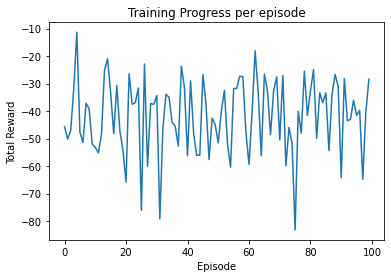

In [20]:
plt.plot(epr)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress per episode")
plt.show()

## Rendering and saving the working performance of this model on our environment

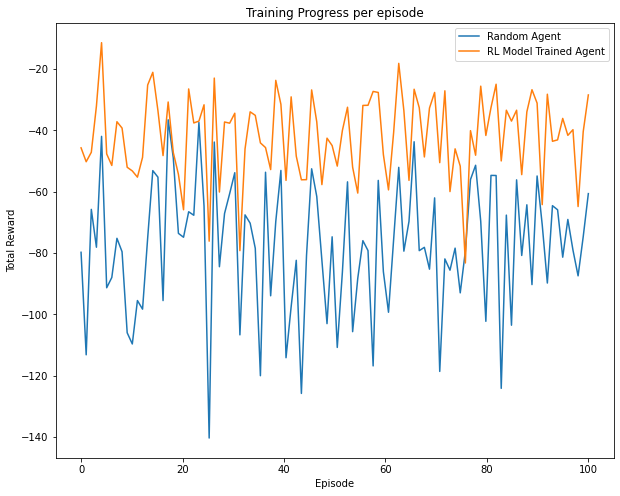

In [21]:
x = x = np.linspace(0, 100,100)
plt.figure(figsize=(10, 8))
plt.plot(x,epr1, label = "Random Agent")
plt.plot(x,epr, label = "RL Model Trained Agent")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress per episode")
plt.legend(loc = "upper right")
plt.show()

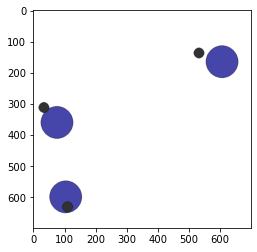

In [24]:
env1 = env_fn.env(**env_kwargs, render_mode = 'rgb_array')
env1.reset()
#env.render()
r1 = []
i1 = 0
images = []
for agent in env1.agent_iter():
    observation, reward, termination, truncation, info = env1.last()

    r1.append(reward)
    i1+=1
    if termination or truncation:
        action = None
    else:
        action = model.predict(observation, deterministic=True)[0]
    env1.step(action)
    img= env1.render()
    images.append(img)
    plt.imshow(img)
    plt.pause(0.01)
    clear_output(wait = True)

In [47]:
output_dir1 = r"C:\Users\Mansi Panchal\OneDrive\Desktop\msc_project\sequential_images\rl" 
if not os.path.exists(output_dir1):
    os.makedirs(output_dir1)
for idx, imgarray in enumerate(images, 1):  
    img = Image.fromarray(imgarray) 
    img.save(os.path.join(output_dir1, f'image_{idx}.png'))

Overlay complete.


In [48]:
image_files1 = [file for file in os.listdir(output_dir1) if file.startswith("image_") and file.endswith(".png")]
image_files1.sort()

base_image = Image.open(os.path.join(output_dir1, image_files1[-1]))
for overlay_file in image_files1:
    overlay_image = Image.open(os.path.join(output_dir1, overlay_file))
    base_image = Image.blend(base_image, overlay_image, alpha=0.01)

base_image.save(os.path.join(output_dir1, "overlay_result.png"))

print("Overlay complete.")

Overlay complete.


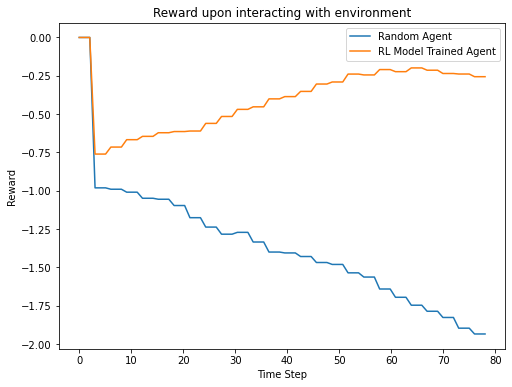

In [25]:
x = x = np.linspace(0, 78,78)
plt.figure(figsize=(8,6))
plt.plot(x,r, label = "Random Agent")
plt.plot(x,r1, label = "RL Model Trained Agent")
plt.xlabel("Time Step")
plt.ylabel("Reward")
plt.title("Reward upon interacting with environment")
plt.legend(loc = "upper right")
plt.show()

In [40]:
import imageio

filename = "simple_spread_a2c.gif"

if os.path.exists(filename):
    base_filename, file_extension = os.path.splitext(filename)
    i = 1
    while os.path.exists(f"{base_filename}_{i}{file_extension}"):
        i += 1
    filename = f"{base_filename}_{i}{file_extension}"

# Save the file
imageio.mimsave(filename, [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)

In [26]:
avgr = sum(r1)/i1
print("Average Reward: ", avgr)

Average Reward:  -0.40082284616197056


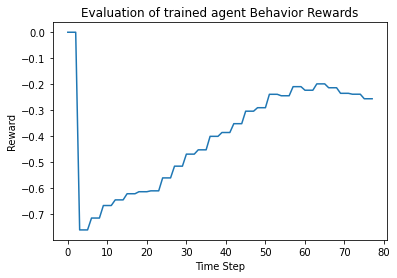

In [27]:
# Plot the rewards
plt.plot(r1)
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.title('Evaluation of trained agent Behavior Rewards')
plt.show()

## Histogram of Multi-Agent Environment Performance

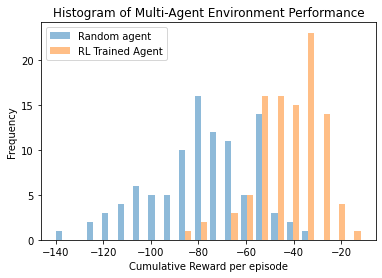

In [28]:
plt.hist([epr1,epr], bins=20, alpha=0.5, label=['Random agent', 'RL Trained Agent'])

# Add legend
plt.legend(loc='upper left')

# Add title and axis names
plt.title('Histogram of Multi-Agent Environment Performance')
plt.xlabel('Cumulative Reward per episode')
plt.ylabel('Frequency')

# Show plot
plt.show()